# Ejercicio 1

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Leer datos

In [2]:
# leer los datos
df = pd.read_csv('datos_financieros.csv')

In [4]:
#mostrar los primeros 5
df.head()

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5
0,0.009934,-0.002765,0.012954,0.030461,-0.004683
1,-0.004683,0.031584,0.015349,-0.009389,0.010851
2,-0.009268,-0.009315,0.004839,-0.038266,-0.034498
3,-0.011246,-0.020257,0.006285,-0.018160,-0.028246
4,0.029313,-0.004516,0.001351,-0.028495,-0.010888


In [6]:
#mostrar la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Activo_1  100 non-null    float64
 1   Activo_2  100 non-null    float64
 2   Activo_3  100 non-null    float64
 3   Activo_4  100 non-null    float64
 4   Activo_5  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [7]:
#estadistica descriptiva
df.describe()

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.000895,0.001539,-0.001877,0.002561,-0.000644
std,0.018007,0.019682,0.019679,0.019191,0.021456
min,-0.039042,-0.046038,-0.064825,-0.038266,-0.052395
25%,-0.014698,-0.013563,-0.014006,-0.010726,-0.015141
50%,-0.000202,0.001328,-0.000493,0.003049,-0.002914
75%,0.010485,0.016613,0.010648,0.013359,0.012963
max,0.046293,0.037724,0.042443,0.061578,0.077055


## Estandarización de los datos


In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Aplicar el PCA

In [12]:
# Aplicación de PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Creación del DataFrame con los nuevos componentes
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,-0.075174,0.288470
1,-1.213757,1.287095
2,1.322085,0.707164
3,1.092411,0.183511
4,1.858440,1.252090
...,...,...
95,-1.964774,-0.681381
96,1.147474,-1.597318
97,-1.156301,-2.215237
98,-1.112114,0.886965


In [17]:
df_pca.to_csv('datos_pca_activos.csv')

## Ver el modelo

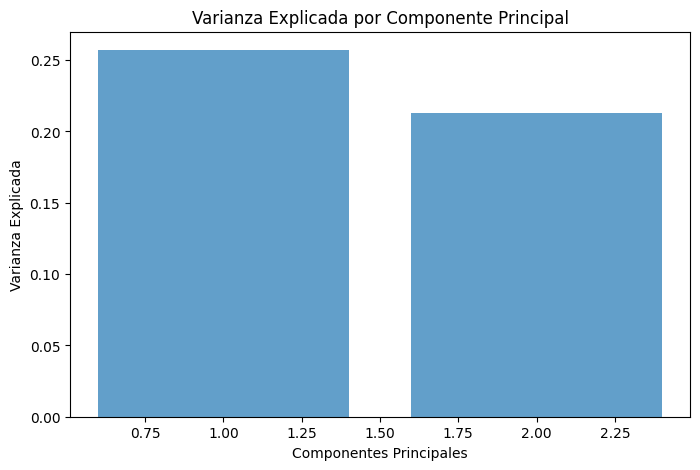

Varianza explicada acumulada: [0.25707979 0.46980346]


In [13]:
# Varianza explicada
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

# Impresión de la varianza explicada acumulada
print("Varianza explicada acumulada:", np.cumsum(pca.explained_variance_ratio_))

In [16]:
pca.explained_variance_ratio_

array([0.25707979, 0.21272367])

In [14]:
# Mostrar la composición de cada componente principal
componentes = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])
print("Composición de los Componentes Principales:")
print(componentes)


Composición de los Componentes Principales:
     Activo_1  Activo_2  Activo_3  Activo_4  Activo_5
PC1  0.590383 -0.562465 -0.222864 -0.320135 -0.427698
PC2  0.385718  0.311884  0.799726 -0.335421 -0.043376


# Ejercicio 2

## Importar librerías

In [29]:
# Importar librerías
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## leer los datos

In [30]:
# leer datos de acciones
# ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = pd.read_csv('stocks.csv')

In [31]:
#mostrar los primeros 5
data.head()

,Date,AAPL,AMZN,GOOGL,MSFT,TSLA
0,2021-01-04,126.544235,159.331497,85.994766,210.423096,243.256668
1,2021-01-05,128.108780,160.925507,86.688255,210.626114,245.036667
2,2021-01-06,123.796455,156.919006,85.832840,205.164673,251.993332
3,2021-01-07,128.020782,158.108002,88.396561,211.003052,272.013336
4,2021-01-08,129.125778,159.134995,89.566818,212.288666,293.339996


In [32]:
data.tail()

,Date,AAPL,AMZN,GOOGL,MSFT,TSLA
999,2024-12-23,255.270004,225.059998,194.630005,435.250000,430.600006
1000,2024-12-24,258.200012,229.050003,196.110001,439.329987,462.279999
1001,2024-12-26,259.019989,227.050003,195.600006,438.109985,454.130005
1002,2024-12-27,255.589996,223.750000,192.759995,430.529999,431.660004
1003,2024-12-30,252.199997,221.300003,191.240005,424.829987,417.410004


In [33]:
# ver la informacion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1004 non-null   object 
 1   AAPL    1004 non-null   float64
 2   AMZN    1004 non-null   float64
 3   GOOGL   1004 non-null   float64
 4   MSFT    1004 non-null   float64
 5   TSLA    1004 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.2+ KB


In [34]:
# estadistica descriptiva
data.describe()

,AAPL,AMZN,GOOGL,MSFT,TSLA
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,167.217075,149.834430,129.954881,315.048787,242.665179
std,31.406002,32.265993,25.568757,70.091288,60.015104
min,113.953239,81.820000,83.128654,205.164673,108.099998
25%,143.660069,125.891373,109.859873,253.386936,200.337498
50%,164.121941,155.611504,129.830109,296.738083,236.518333
75%,183.987782,173.546371,144.094887,374.631042,272.020004
max,259.019989,232.929993,196.660004,465.786438,479.859985


In [41]:
data = data.drop(columns=['Date'])
data

,AAPL,AMZN,GOOGL,MSFT,TSLA
0,126.544235,159.331497,85.994766,210.423096,243.256668
1,128.108780,160.925507,86.688255,210.626114,245.036667
2,123.796455,156.919006,85.832840,205.164673,251.993332
3,128.020782,158.108002,88.396561,211.003052,272.013336
4,129.125778,159.134995,89.566818,212.288666,293.339996
...,...,...,...,...,...
999,255.270004,225.059998,194.630005,435.250000,430.600006
1000,258.200012,229.050003,196.110001,439.329987,462.279999
1001,259.019989,227.050003,195.600006,438.109985,454.130005
1002,255.589996,223.750000,192.759995,430.529999,431.660004


In [42]:
# returns
returns = data.pct_change().dropna()
returns

,AAPL,AMZN,GOOGL,MSFT,TSLA
1,0.012364,0.010004,0.008064,0.000965,0.007317
2,-0.033661,-0.024897,-0.009868,-0.025930,0.028390
3,0.034123,0.007577,0.029869,0.028457,0.079447
4,0.008631,0.006496,0.013239,0.006093,0.078403
5,-0.023249,-0.021519,-0.023106,-0.009699,-0.078214
...,...,...,...,...,...
999,0.003065,0.000622,0.016823,-0.003092,0.022657
1000,0.011478,0.017729,0.007604,0.009374,0.073572
1001,0.003176,-0.008732,-0.002601,-0.002777,-0.017630
1002,-0.013242,-0.014534,-0.014519,-0.017302,-0.049479


## Aplicamos el PCA

In [47]:
# Aplicar PCA
pca = PCA(n_components=2)
pca.fit(returns)
principal_components = pca.fit_transform(returns)

Varianza explicada por cada componente: [0.65706398 0.21320898]


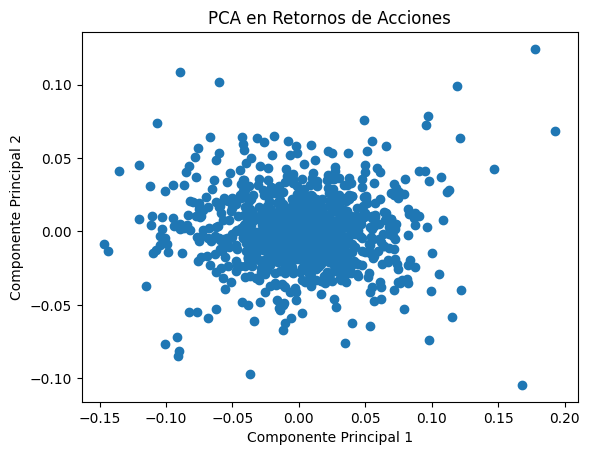

In [43]:

# Varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Transformar los datos
transformed_data = pca.transform(returns)

# Graficar los componentes principales
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA en Retornos de Acciones')
plt.show()

In [54]:
pca.explained_variance_ratio_

array([0.65706398, 0.21320898])

In [48]:
# Creación del DataFrame con los nuevos componentes
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.013449,-0.007385
1,-0.006412,0.052005
2,0.090048,0.010587
3,0.071405,0.032622
4,-0.088183,-0.014406
...,...,...
998,0.021500,0.006090
999,0.071459,0.024813
1000,-0.019871,-0.003968
1001,-0.059246,-0.004819


In [45]:
# Mostrar la composición de cada componente principal
componentes = pd.DataFrame(pca.components_, columns=data.columns, index=['PC1', 'PC2'])
print("Composición de los Componentes Principales:")
print(componentes)


Composición de los Componentes Principales:
         AAPL      AMZN     GOOGL      MSFT      TSLA
PC1  0.270412  0.354588  0.289990  0.254937  0.807501
PC2 -0.249743 -0.504580 -0.458415 -0.362592  0.584303
